In [1]:
import numpy as np

#Co-occurence Matrix

In [2]:
def co_occurence(corpus, vocab, window_size=4):
    num_words = len(vocab)
    M = np.zeros((num_words, num_words),dtype=int)
    for line in corpus:
        for i in range(len(line)):
            target = line[i]
            target_index = vocab[target]
            left = max(i - window_size, 0)
            right = min(i + window_size, len(line) - 1)
        for j in range(left, i):
            window_word = line[j]
            M[target_index][vocab[window_word]] += 1
            M[vocab[window_word]][target_index] += 1
    return M
#https://www.cnblogs.com/shiyublog/p/11136940.html

# you may code the matrix creation or may use the above function

In [3]:
pip install -U scikit-learn

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
corpus = [ 'She eats banana',
         'She eats cookies',
         'She likes banana', 
         'She likes cookies',
         'He eats cookies', 
         'He eats banana',
         'He likes cookies', 
         'He likes banana',
         'She likes NLP',
         'He likes NLP',
         ]

In [6]:
import nltk
from nltk.tokenize import sent_tokenize

In [7]:
BoWvectorizer = CountVectorizer(analyzer="word", token_pattern='[a-zA-Z]+')
#BoWvectorizer = CountVectorizer(stop_words= 'english') 
# fit() function will learn a vocabulary from one or more documents.
BoWvectorizer.fit(corpus)
# transform() function will transform one or more documents to vectors
vector = BoWvectorizer.transform(corpus)

#BoWvectorizer.vocabulary_

In [8]:
words = BoWvectorizer.get_feature_names_out()
len(words)

7

In [10]:
#corpus should be sent as list of list of tokens
c1 = []
i=0
for doc in corpus:
    t=[]
    for w in doc.split():
        if w.lower() in words:
              t.append(w.lower())
    c1.append(t)

In [11]:
coMat = co_occurence(c1, BoWvectorizer.vocabulary_,4)
coMat

array([[0, 0, 2, 2, 2, 0, 2],
       [0, 0, 2, 2, 2, 0, 2],
       [2, 2, 0, 2, 0, 0, 2],
       [2, 2, 2, 0, 3, 1, 0],
       [2, 2, 0, 3, 0, 2, 3],
       [0, 0, 0, 1, 2, 0, 1],
       [2, 2, 2, 0, 3, 1, 0]])

#PPMI computation

In [ ]:
PPMI =

#Save results

In [ ]:
import pandas as pd

In [ ]:
df2= pd.DataFrame(data=PPMI, columns = words)
df2.insert(0, "words", words, True)
df2.to_csv('n2.csv')

#Dimensionality Reduction using SVD


In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(2)

In [ ]:
transformed = svd.fit_transform(PPMI)

In [ ]:
for i in range(len(transformed)):
    print(words[i], transformed[i])

In [ ]:
df3= pd.DataFrame(data=transformed)
df3.insert(0, "words", words, True)
df3

In [ ]:
df3.to_csv('embeddings.csv')

Natural Language Processing - Lab Manual
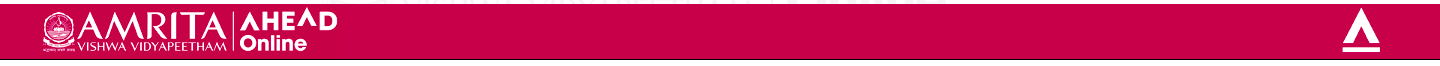

#s

In [ ]:
R2 = np.dot(transformed, transformed.T)

In [ ]:
R2

array([[ 4.69243855,  7.69471711,  7.02093398, ...,  0.33468186,
         2.18603716,  3.13077637],
       [ 7.69471711, 15.4273177 , 11.59808135, ..., -1.68842276,
         1.8012081 ,  5.90039491],
       [ 7.02093398, 11.59808135, 10.50745807, ...,  0.43301513,
         3.21679504,  4.70754919],
       ...,
       [ 0.33468186, -1.68842276,  0.43301513, ...,  1.80545547,
         1.57616023, -0.38709836],
       [ 2.18603716,  1.8012081 ,  3.21679504, ...,  1.57616023,
         2.15058598,  0.9719191 ],
       [ 3.13077637,  5.90039491,  4.70754919, ..., -0.38709836,
         0.9719191 ,  2.29797234]])

In [ ]:
df4 = pd.DataFrame(data=R2, columns =words )
df4.insert(0, "words", words, True)

In [ ]:
df4

,words,am,and,are,at,breakfast,by,cereals,chutney,delicious,eat,eaten,evening,every,for,from,have,i,idlies,in,india,lentils,made,mainly,morning,of,or,other,people,pm,rice,sambar,southern,states,the,with
0,am,4.692439,7.694717,7.020934,7.529209,2.616702,2.203551,1.962152,1.582990,3.130776,2.186037,2.208379,1.544374,2.616702,2.616702,3.507209,7.898329,8.605991,12.773767,2.661087,0.130806,1.340214,3.321571,2.205325,2.616702,0.192970,1.659287,2.246116,1.208117,2.463454,3.665250,3.130776,0.480970,0.334682,2.186037,3.130776
1,and,7.694717,15.427318,11.598081,12.815847,3.164132,1.142747,5.218057,3.565798,5.900395,1.801208,1.446590,1.132377,3.164132,3.164132,7.281492,10.859605,10.695273,18.081713,0.356329,-1.394286,3.695320,6.693306,1.772552,3.164132,-1.609542,4.487338,5.878316,-0.470799,4.909774,7.790598,5.900395,-1.720239,-1.688423,1.801208,5.900395
2,are,7.020934,11.598081,10.507458,11.279587,3.881050,3.222191,2.996392,2.397877,4.707549,3.216795,3.238377,2.268332,3.881050,3.881050,5.293904,11.754309,12.773016,19.025654,3.860236,0.147001,2.050606,5.007556,3.243828,3.881050,0.230407,2.536151,3.427158,1.733370,3.712225,5.537937,4.707549,0.643667,0.433015,3.216795,4.707549
3,at,7.529209,12.815847,11.279587,12.159337,4.010360,3.122924,3.482568,2.702024,5.151516,3.209627,3.180110,2.244101,4.010360,4.010360,5.883125,12.323661,13.237810,20.017409,3.600330,-0.058889,2.400629,5.537852,3.230503,4.010360,-0.012137,2.957503,3.970713,1.528848,4.098088,6.178466,5.151516,0.352578,0.163245,3.209627,5.151516
4,breakfast,2.616702,3.164132,3.881050,4.010360,1.911091,2.219691,0.291847,0.493711,1.438432,1.934321,2.103698,1.422742,1.911091,1.911091,1.342004,5.243539,6.169479,8.272190,3.091147,0.718171,0.146714,1.352298,1.969254,1.911091,0.880052,0.216838,0.372146,1.657065,1.024729,1.329889,1.438432,1.274459,1.083913,1.934321,1.438432
5,by,2.203551,1.142747,3.222191,3.122924,2.219691,3.207522,-0.837854,-0.109662,0.796117,2.594980,2.949548,1.956509,2.219691,2.219691,0.301172,5.548915,7.046252,8.517922,4.773773,1.476219,-0.687676,0.463555,2.657052,2.219691,1.784355,-0.774225,-0.875649,2.723558,0.391583,0.155579,0.796117,2.432268,2.124632,2.594980,0.796117
6,cereals,1.962152,5.218057,2.996392,3.482568,0.291847,-0.837854,2.244962,1.352628,1.854946,-0.355860,-0.625117,-0.351184,0.291847,0.291847,2.556241,1.812940,1.165531,3.301405,-1.740759,-1.090862,1.626818,2.276549,-0.390721,0.291847,-1.290730,1.951640,2.502278,-1.240725,1.649718,2.800305,1.854946,-1.585411,-1.453112,-0.355860,1.854946
7,chutney,1.582990,3.565798,2.397877,2.702024,0.493711,-0.109662,1.352628,0.868923,1.320812,0.121687,-0.005862,0.037588,0.493711,0.493711,1.711520,1.942145,1.723482,3.320087,-0.485876,-0.511326,0.969193,1.550918,0.107380,0.493711,-0.599870,1.169638,1.515615,-0.438988,1.131482,1.851133,1.320812,-0.703990,-0.659531,0.121687,1.320812
8,delicious,3.130776,5.900395,4.707549,5.151516,1.438432,0.796117,1.854946,1.320812,2.297972,0.971919,0.880078,0.648402,1.438432,1.438432,2.757523,4.698917,4.809624,7.740972,0.682121,-0.351659,1.302789,2.556242,0.968340,1.438432,-0.396725,1.589011,2.097502,0.137091,1.881020,2.931162,2.297972,-0.363625,-0.387098,0.971919,2.297972
9,eat,2.186037,1.801208,3.216795,3.209627,1.934321,2.594980,-0.355860,0.121687,0.971919,2.150586,2.409371,1.608283,1.934321,1.934321,0.662397,5.007697,6.178358,7.769509,3.783652,1.082226,-0.326364,0.756062,2.197841,1.934321,1.312546,-0.348356,-0.347115,2.119324,0.595231,0.577351,0.971919,1.816792,1.576160,2.150586,0.971919


In [ ]:
from sklearn.metrics.pairwise import paired_cosine_distances,cosine_similarity

In [ ]:
paired_cosine_distances(R2,R2.T)

array([5.57966731e-32, 0.00000000e+00, 1.81360911e-32, 1.37241566e-32,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.12950676e-32, 1.11899539e-32, 2.74685773e-32, 0.00000000e+00,
       8.21830418e-33, 1.08484023e-32, 0.00000000e+00, 1.58949406e-32,
       0.00000000e+00, 1.90245767e-32, 0.00000000e+00, 1.24117157e-32,
       0.00000000e+00, 0.00000000e+00, 5.45316531e-33, 0.00000000e+00,
       5.75734799e-32, 2.22926391e-32, 0.00000000e+00, 4.46304172e-32,
       1.63132285e-32, 0.00000000e+00, 0.00000000e+00, 1.31444719e-32,
       0.00000000e+00, 0.00000000e+00, 2.58089659e-32])

In [ ]:
Sim = cosine_similarity(R2,R2.T)

In [ ]:
df5 = pd.DataFrame(data=Sim, columns = words )
df5.insert(0, "words", words, True)

In [ ]:
df5

,words,am,and,are,at,breakfast,by,cereals,chutney,delicious,eat,eaten,evening,every,for,from,have,i,idlies,in,india,lentils,made,mainly,morning,of,or,other,people,pm,rice,sambar,southern,states,the,with
0,am,1.000000,0.963086,0.999962,0.998984,0.961428,0.831425,0.746168,0.897126,0.983627,0.891031,0.857817,0.873171,0.961428,0.961428,0.947160,0.984016,0.966570,0.988305,0.762339,0.341680,0.707348,0.960976,0.887060,0.961428,0.363308,0.728300,0.762907,0.684338,0.965477,0.934589,0.983627,0.459840,0.417151,0.891031,0.983627
1,and,0.963086,1.000000,0.965389,0.974239,0.851894,0.651160,0.897842,0.982933,0.995830,0.735941,0.687799,0.709730,0.851894,0.851894,0.998544,0.899755,0.861868,0.910773,0.559982,0.076075,0.871521,0.999970,0.730041,0.851894,0.099097,0.885883,0.908781,0.462790,0.999959,0.995850,0.995830,0.203821,0.157099,0.735941,0.995830
2,are,0.999962,0.965389,1.000000,0.999338,0.959001,0.826566,0.751925,0.900931,0.985156,0.887053,0.853319,0.868903,0.959001,0.959001,0.949912,0.982432,0.964306,0.986943,0.756688,0.333501,0.713463,0.963343,0.883015,0.959001,0.355199,0.734227,0.768495,0.677977,0.967703,0.937645,0.985156,0.452108,0.409238,0.887053,0.985156
3,at,0.998984,0.974239,0.999338,1.000000,0.948056,0.805541,0.775412,0.916123,0.990749,0.869669,0.833785,0.850319,0.948056,0.948056,0.960653,0.974992,0.954033,0.980429,0.732400,0.298981,0.738484,0.972466,0.865355,0.948056,0.320954,0.758441,0.791266,0.650784,0.976234,0.949670,0.990749,0.419356,0.375771,0.869669,0.990749
4,breakfast,0.961428,0.851894,0.959001,0.948056,1.000000,0.952187,0.534265,0.741009,0.896117,0.981522,0.966097,0.973558,1.000000,1.000000,0.822399,0.995042,0.999813,0.992127,0.910945,0.587004,0.485635,0.847819,0.979826,1.000000,0.605557,0.511722,0.555653,0.858504,0.856586,0.800694,0.896117,0.686355,0.651043,0.981522,0.896117
5,by,0.831425,0.651160,0.826566,0.805541,0.952187,1.000000,0.250464,0.500427,0.717679,0.993053,0.998783,0.996801,0.952187,0.952187,0.609267,0.917083,0.946098,0.906431,0.993424,0.806278,0.195346,0.645273,0.994036,0.952187,0.819733,0.224772,0.275076,0.974127,0.657983,0.579385,0.717679,0.875729,0.851813,0.993053,0.717679
6,cereals,0.746168,0.897842,0.751925,0.775412,0.534265,0.250464,1.000000,0.963522,0.853931,0.362643,0.297907,0.327033,0.534265,0.534265,0.920290,0.615685,0.550521,0.635920,0.137970,-0.370739,0.998402,0.901219,0.354546,0.534265,-0.349177,0.999650,0.999675,0.025185,0.893831,0.934190,0.853931,-0.248075,-0.293801,0.362643,0.853931
7,chutney,0.897126,0.982933,0.900931,0.916123,0.741009,0.500427,0.963522,1.000000,0.962052,0.598827,0.542519,0.568017,0.741009,0.741009,0.991426,0.804117,0.753863,0.819268,0.398008,-0.108657,0.946855,0.984326,0.591858,0.741009,-0.085655,0.956107,0.970035,0.291812,0.981232,0.995596,0.962052,0.020239,-0.027264,0.598827,0.962052
8,delicious,0.983627,0.995830,0.985156,0.990749,0.896117,0.717679,0.853931,0.962052,1.000000,0.794635,0.751151,0.771036,0.896117,0.896117,0.989458,0.935813,0.904537,0.944643,0.633227,0.166717,0.823154,0.995095,0.789340,0.896117,0.189459,0.839869,0.866926,0.541728,0.996613,0.983395,1.000000,0.292281,0.246535,0.794635,1.000000
9,eat,0.891031,0.735941,0.887053,0.869669,0.981522,0.993053,0.362643,0.598827,0.794635,1.000000,0.997648,0.999280,0.981522,0.981522,0.698342,0.957626,0.977636,0.949832,0.973050,0.731071,0.309392,0.730684,0.999962,0.981522,0.746643,0.337870,0.386296,0.940766,0.742021,0.671267,0.794635,0.812834,0.784254,1.000000,0.794635
